In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("Ecommerce Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Here we will be performing Multi-ValuedLinearRegression on numeric data type columns in the given dataset.
We are applying regression here as we have to predict the yearly amount spent by each user using the numeric data type.
Here we are to find how these columns contribute to the yearly amount spent and its role in fitting the plane(as they are n parameters) in the n+1 dimension space. 
#Note : As there are n variables we will need Multi-ValuedLinearRegression

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


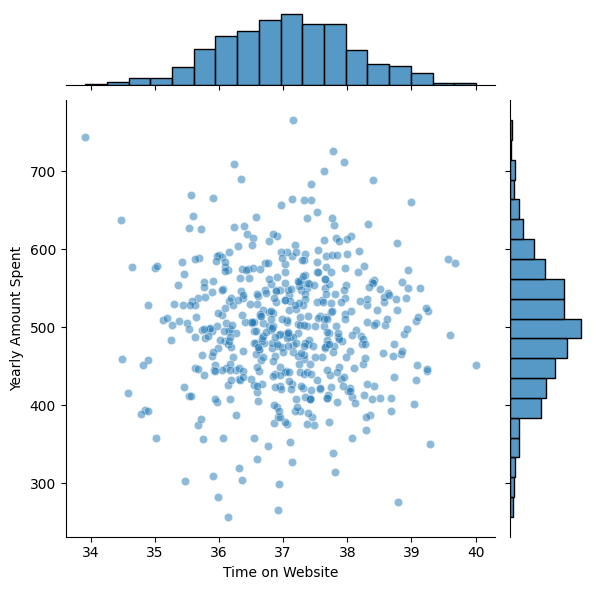

In [9]:
sns.jointplot(x="Time on Website",y="Yearly Amount Spent",data=df,alpha=0.5)


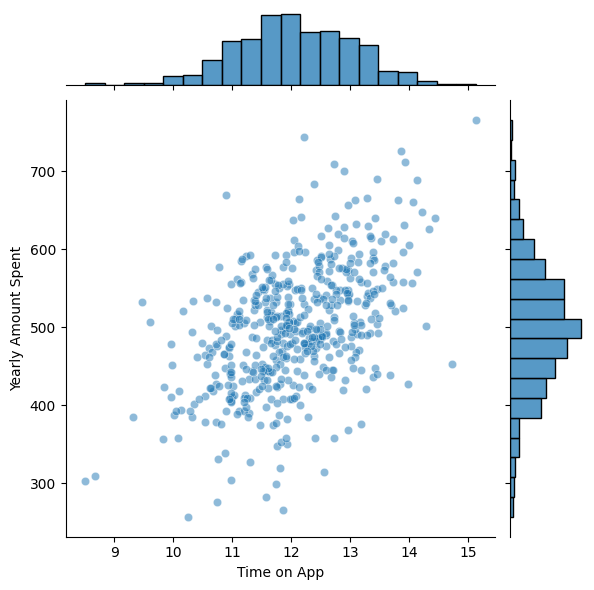

In [10]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df,alpha=0.5)

We chose jointplot for better analysis as it gives both the histogram and the scatterplot of botht the Variables.
Conclusion : As clearly seen in the diagram the Time on App is showing a linear relationship with the Yearly Amount Spent as comapred to Time of Website

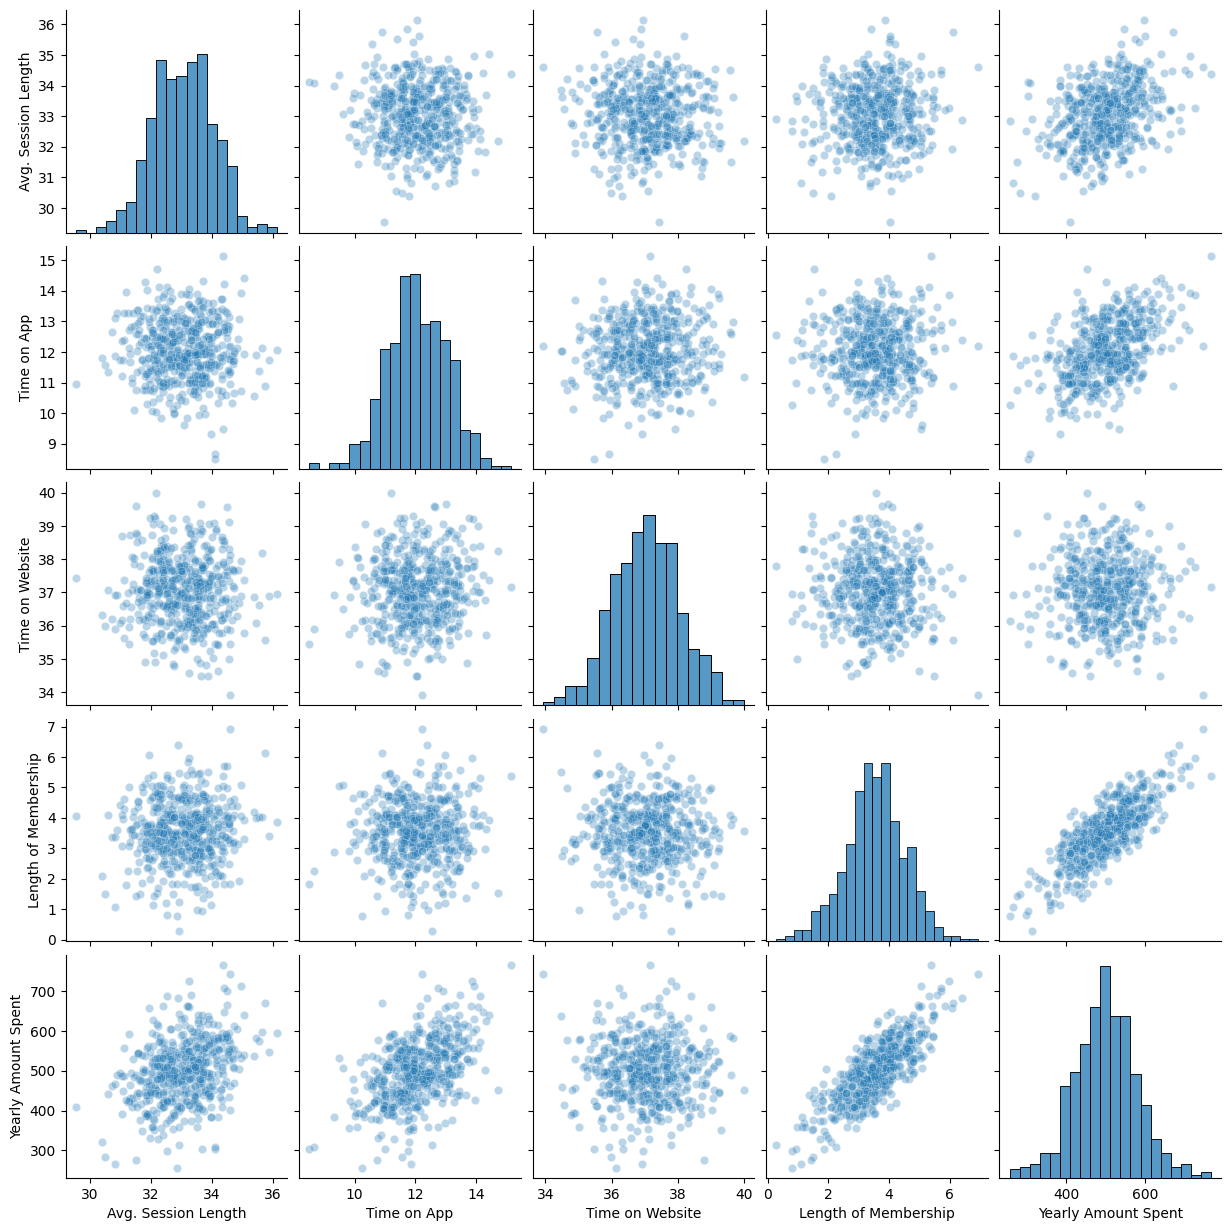

In [21]:
#   Below is Pairplot used to calculate the relations with every variable not suited for huge computations and begginers.
#   Can be used to find immediate relations 
#   Kind of like Heatmap but better ( I think )
sns.pairplot(df,kind='scatter',plot_kws={'alpha':0.3})

This graphs proved to be helpful.
We founf that there is a strong correlation between Length of Membership and Yearly Amount Spent.

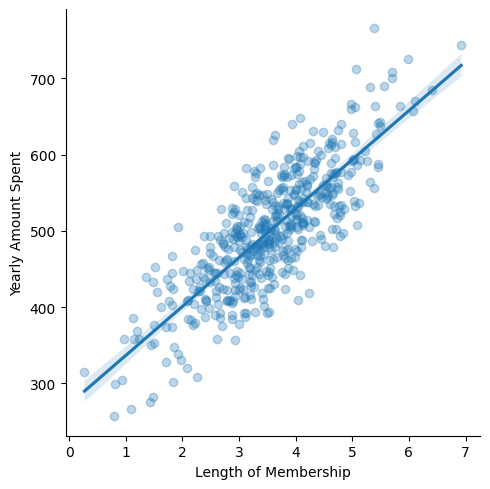

In [22]:
sns.lmplot(
            x='Length of Membership',
            y='Yearly Amount Spent',
            data=df,
            scatter_kws={'alpha':0.3}
)

In [ ]:
from sklearn.model_selection import train_test_split
# Standard library for dividing the whole dataset into many different test and train groups so that proper prediction is done without overfitting.

In [ ]:
X = df[['Time on App','Time on Website','Length of Membership','Avg. Session Length']]
y = df['Yearly Amount Spent']
# We are storing all the variables that will help in prediction for the output column in one variable and the output in another variable

In [ ]:
#Splitting into train and test sets for both variables 
# train_test_split(Train paramter,Test parameter,test_size=the lower test split percentage in decimal for splitting,random_state=any reproducible number)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
X_test

,Time on App,Time on Website,Length of Membership,Avg. Session Length
361,10.347877,39.045156,3.434560,32.077590
73,12.817113,37.031539,3.851579,32.808698
374,10.101632,38.043453,4.238296,31.447446
155,13.457725,37.238806,2.941411,32.449522
104,10.994224,38.074452,3.428860,31.389585
...,...,...,...,...
266,11.777772,37.979827,3.784273,34.555283
23,11.657576,36.772604,3.919302,32.903251
222,11.109456,38.585855,3.892891,34.334865
261,13.041245,36.655208,3.456234,32.550527


Training the model: 

In [29]:
from sklearn.linear_model import LinearRegression
# Importing Linear Regression from list of linear models in sklearn library

In [ ]:
#Instantiate the model
linearModel = LinearRegression()


In [32]:
# Fitting the model with the training parameters of both the dependent coloumns and the predictor column
linearModel.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
linearModel.coef_
# The beta values or the coeffecients of the variables in the equation of MVLR
# ***   The higher the coeffecient the more important the variable    ***

array([38.59713548,  0.45914788, 61.67473243, 25.72425621])

In [ ]:
# Same as above but in tabulated form
cdf = pd.DataFrame(linearModel.coef_,X.columns,columns=['Coef'])
cdf

,Coef
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732
Avg. Session Length,25.724256


In [ ]:
#   Making predictions with the help of test group
predictions=linearModel.predict(X_test)
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'Evaluation of the MVLR model')

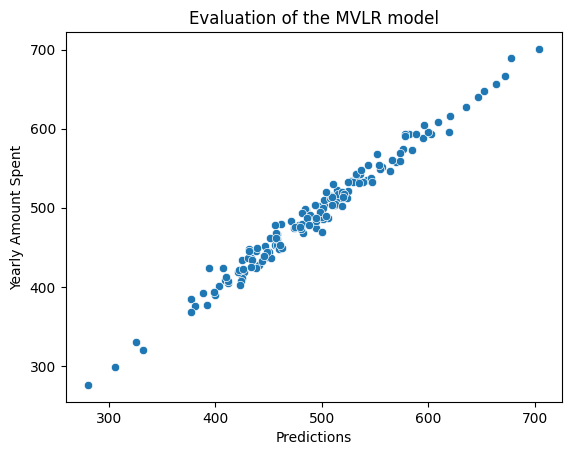

In [45]:
#   Plotting the test data with the predictions to check the accuracy
sns.scatterplot(
                    x=predictions,
                    y=y_test,
)
plt.xlabel('Predictions')
plt.title('Evaluation of the MVLR model')

In [49]:
# To test the accuracy of the model we will be using th rmse,abse,mse from sklearn.metrics 
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error
import math 

In [53]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,predictions))
print("Mean Squared Error : ",mean_squared_error(y_test,predictions))
print("Root Mean Squared Error : ",math.sqrt(root_mean_squared_error(y_test,predictions)))

Mean Absolute Error :  8.426091641432048
Mean Squared Error :  103.91554136503244
Root Mean Squared Error :  3.1927883207101453


In [55]:
# Residual Analysis
residuals = y_test - predictions

In [ ]:
residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

Now we will plot a graph to check whether the residuals are random or not . 
The residuals must be random as it implies that the residuals were created by statistical methods and not bias.
If the residuals are not random the model is said to be biased .

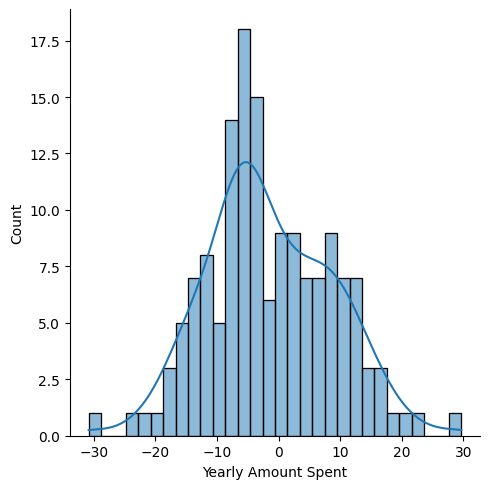

In [61]:
sns.displot(residuals,bins=30,kde=True)

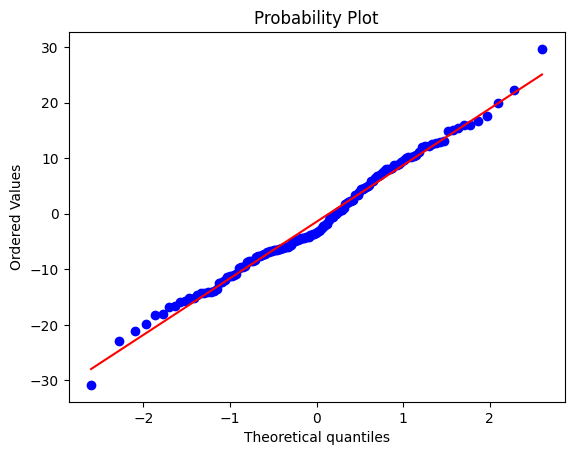

In [62]:
# Another test for Normality
import pylab
import scipy.stats as stats

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

The model is good.